<a href="https://colab.research.google.com/github/Pakhi27/Linear-Regression-Training-pyTorch/blob/main/Linear_Regression_Training_1_parameter_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The class for plotting

class plot_diagram():

    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()

        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())

        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')

In [3]:
import torch

In [4]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

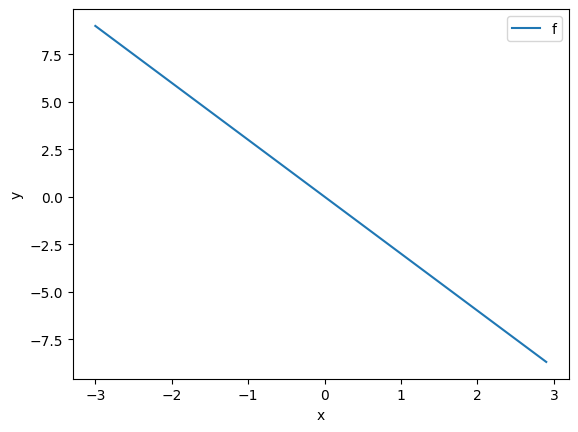

In [5]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

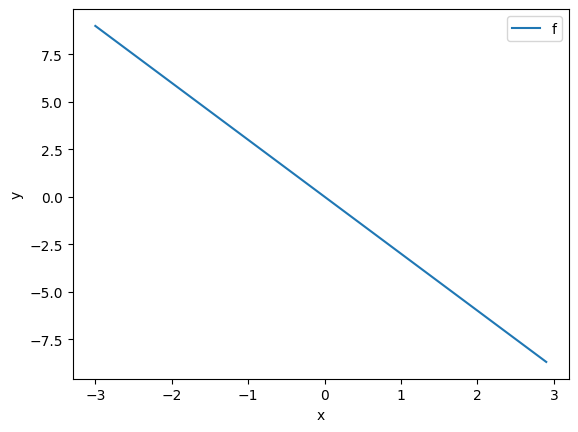

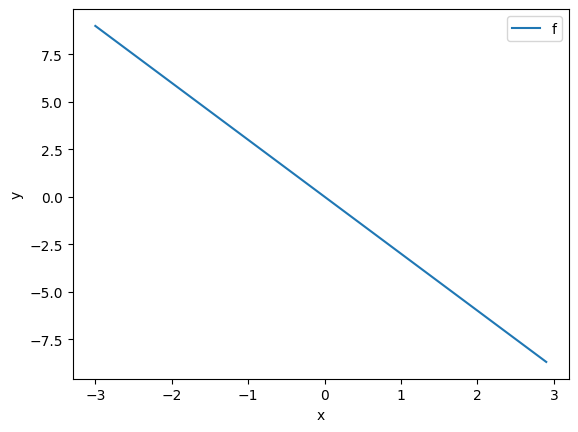

In [7]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# Plot the line with blue
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# Let us add some noise to the data in order to simulate the real data. Use torch.randn(X.size()) to generate Gaussian noise that is the same size as X and has a standard deviation opf 0.1.

In [8]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

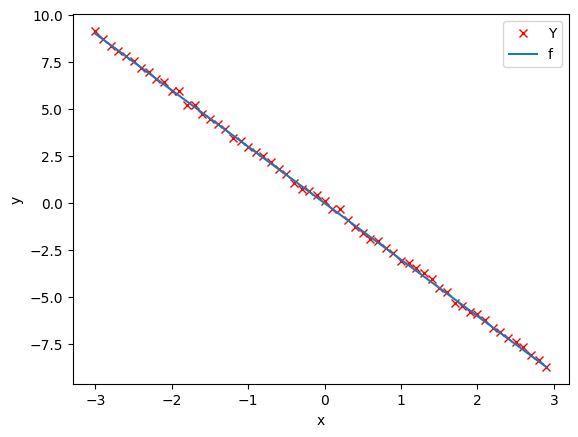

In [9]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Create the Model and Cost Function (Total Loss)¶

In [10]:

def forward(x):
    return w * x

In [11]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [12]:
# Define the learning rate lr and an empty list LOSS to record the loss for each iteration:
lr = 0.1
LOSS = []

In [ ]:
# Now, we create a model parameter by setting the argument requires_grad to  True because the system must learn it.

In [14]:
w = torch.tensor(-10.0, requires_grad = True)

In [15]:
# Create a plot_diagram object to visualize the data space and the parameter space for each iteration during training:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


In [ ]:
# Training the Model

In [17]:
def train_model(iter):
    for epoch in range (iter):

        # make the prediction as we learned in the last lab
        Yhat = forward(X)

        # calculate the iteration
        loss = criterion(Yhat,Y)

        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)

        # store the loss into list
        LOSS.append(loss.item())

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # updata parameters
        w.data = w.data - lr * w.grad.data

        # zero the gradients before running the backward pass
        w.grad.data.zero_()

<ipython-input-2-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


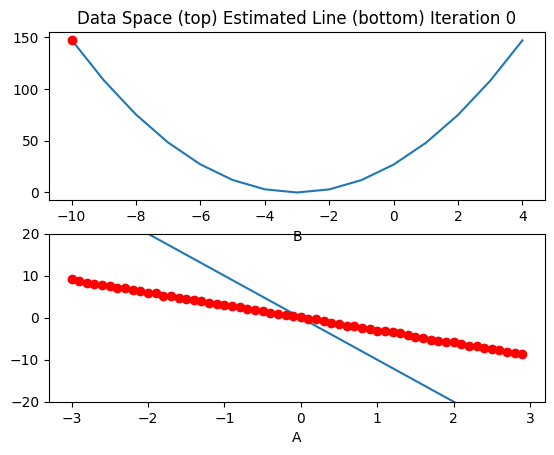

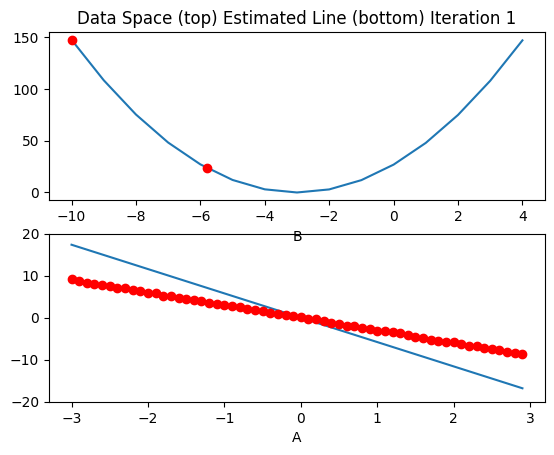

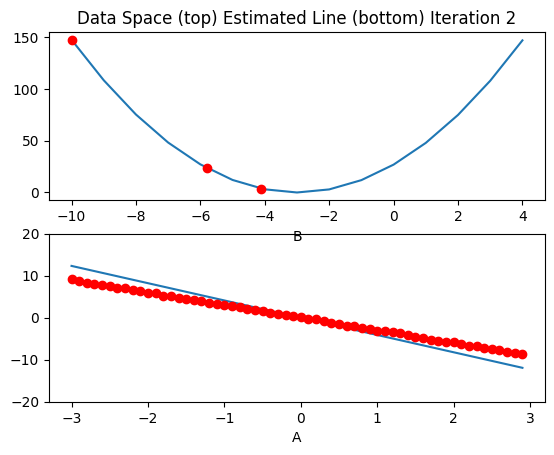

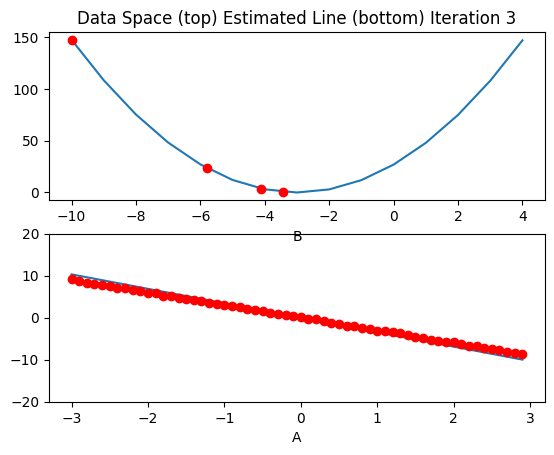

<Figure size 640x480 with 0 Axes>

In [18]:
# Give 4 iterations for training the model here.

train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

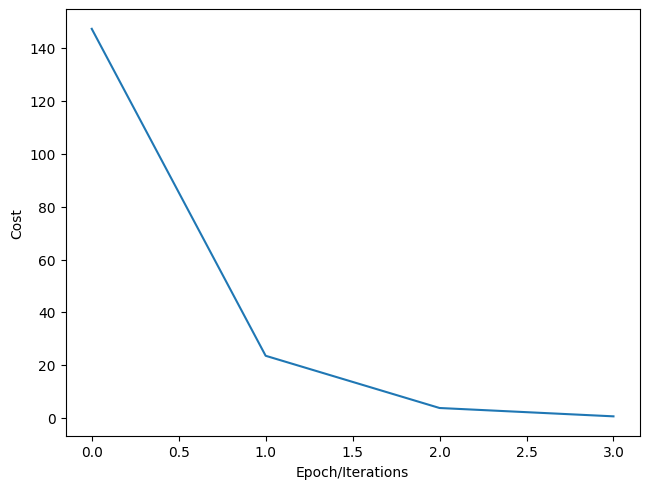

In [19]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [20]:
w = torch.tensor(-15.0, requires_grad = True)

In [21]:
# Create a plot_diagram object to visualize the data space and the parameter space for each iteration during training:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


In [ ]:
# Trainig the model

In [22]:
def train_model(iter):
    for epoch in range (iter):

        # make the prediction as we learned in the last lab
        Yhat = forward(X)

        # calculate the iteration
        loss = criterion(Yhat,Y)

        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)

        # store the loss into list
        LOSS.append(loss.item())

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # updata parameters
        w.data = w.data - lr * w.grad.data
         # zero the gradients before running the backward pass
        w.grad.data.zero_()

<ipython-input-2-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


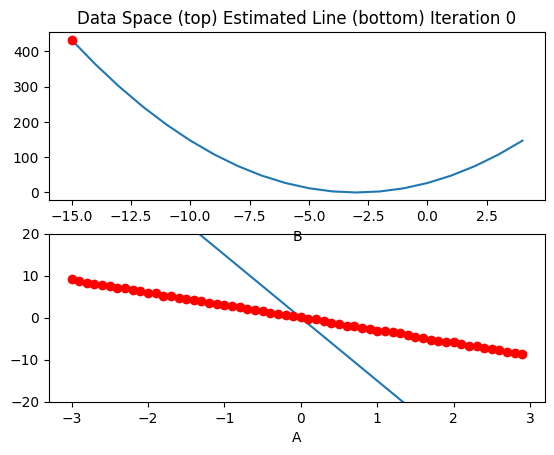

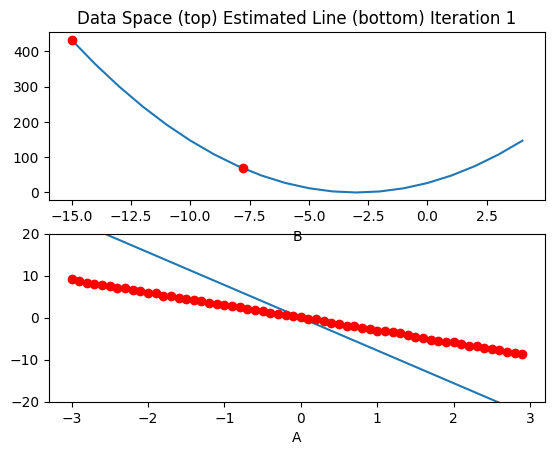

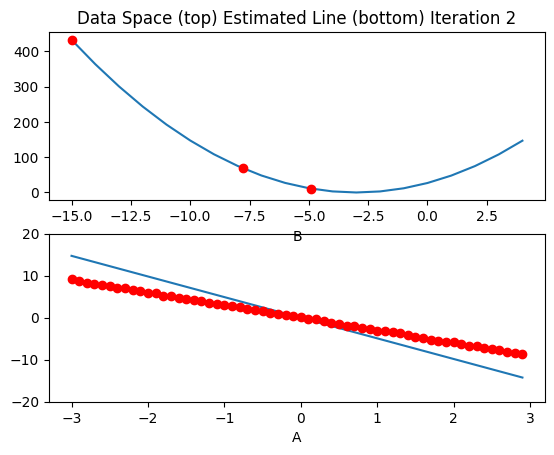

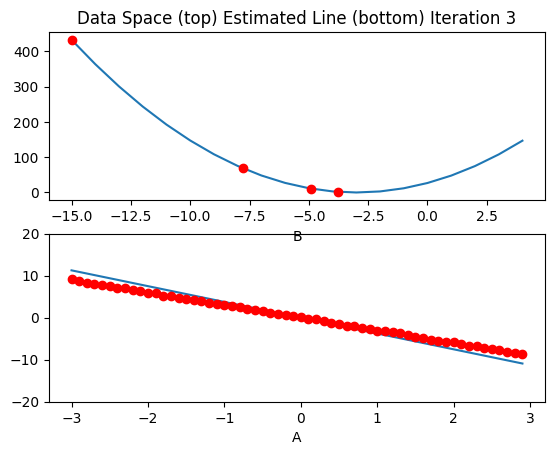

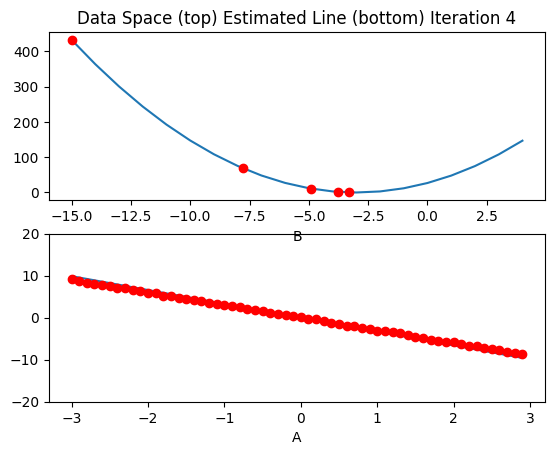

<Figure size 640x480 with 0 Axes>

In [23]:
# Give 5 iterations for training the model here.

train_model(5)

Text(38.347222222222214, 0.5, 'Cost')

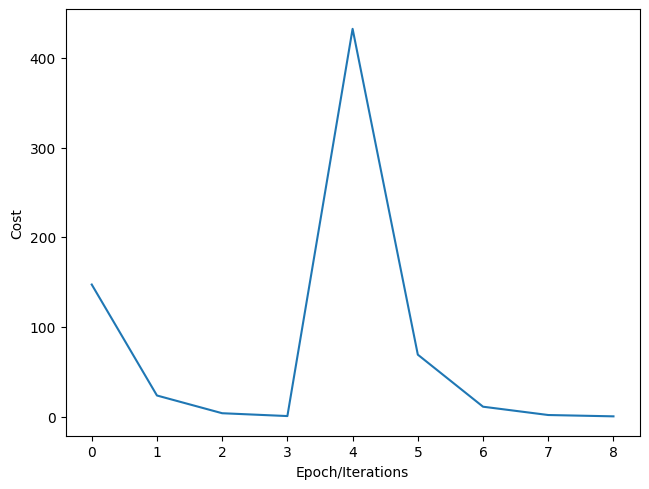

In [24]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")